In [1]:
# coding=utf8

import time
import os
import re
import json
from codecs import open
import matplotlib.pyplot
import numpy as np

DATA_FOLDER = '/home/teven/fake_news/Wikidumps/'
RAW_FOLDER = '/home/teven/fake_news/Wikidumps/raw/'
FINAL_INDEX_FILE = os.path.join(DATA_FOLDER, '2110_final_index.json')
TALK_DATA_FILE = os.path.join(DATA_FOLDER, '2110_talk_data.json')
REVERSE_INDEX_FILE = os.path.join(DATA_FOLDER, '2110_reverse_index.json')

In [2]:
talk_data = json.load(open(TALK_DATA_FILE, 'r', encoding='utf-8'), encoding='utf8')

In [3]:
reverse_index = json.load(open(REVERSE_INDEX_FILE, 'r', encoding='utf-8'), encoding='utf8')
final_index = json.load(open(FINAL_INDEX_FILE, 'r', encoding='utf-8'), encoding='utf8')

In [5]:
values = [(value[0], value[1]) for value in talk_data.values()]

In [6]:
lengths = [value[0] for value in values]
flags = [value[1] for value in values]

In [16]:
sorted_lengths = sorted(lengths)
lnlengths = [np.log(length + 1) for length in sorted_lengths]

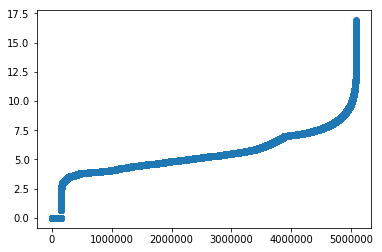

In [18]:
matplotlib.pyplot.scatter(range(len(lengths)), lnlengths)
matplotlib.pyplot.show()

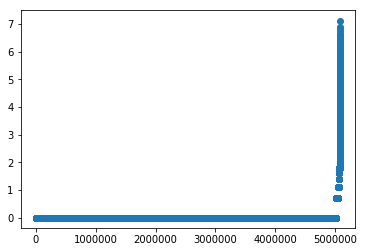

In [22]:
lnflags = [np.log(flag + 1) for flag in sorted(flags)]
matplotlib.pyplot.scatter(range(len(lengths)), lnflags)
matplotlib.pyplot.show()

In [40]:
flagged_articles = [reverse_index[article_id] for article_id, values in talk_data.iteritems() if values[1] > 10 and values[0] > 1800]

In [41]:
print len(flagged_articles)
print flagged_articles

5147
[u'Companion (Doctor Who)', u'September 11 attacks advance-knowledge conspiracy theories', u'Charles Dickens', u'Media Lens', u'Chris Christie', u'Bodyguard (2011 Hindi film)', u'Veganism', u'Vegetarianism', u'Vegemite', u'Charles Jacobs (political activist)', u"Bell's theorem", u'Joseph Berrios', u'WALL-E', u'Trayvon Martin', u'Fred Thompson', u'Race and intelligence', u'John McCain lobbyist controversy', u'League of Militant Atheists', u'Architects & Engineers for 9/11 Truth', u'Charles W. Freeman Jr.', u'History of the United States public debt', u'Natascha Kampusch', u'Bengali calendars', u'Eye movement desensitization and reprocessing', u'Lolcat', u'Breaking Benjamin', u'First-person shooter', u'Socialized medicine', u'Sea of Japan', u'The Professors: The 101 Most Dangerous Academics in America', u'Murder of Kitty Genovese', u'Dog', u'The Final Cut (album)', u'Digvijaya Singh', u'Bircham International University', u'The Elder Scrolls IV: Oblivion', u'Snooki', u'Australian Lab

In [15]:
DATE_PATTERN = re.compile("\[\[(?:Special:Contributions|User:).*?\|.*?\]\](?:\s*\(\[\[User talk\:.*?\|talk\]\]\)|)[A-Za-z0-9 ,:]*?20[0-1][0-9]")

In [17]:
re.findall(DATE_PATTERN, "[[User:Tenebrae|Tenebrae]]    21:18, 12 December 2011")

['[[User:Tenebrae|Tenebrae]]    21:18, 12 December 2011']

In [56]:
[int(match[-4:]) for match in re.findall(DATE_PATTERN, "[[User:qrgt|Zoso 6-9879]]20:40,29 March 2016a")]

[2016]

In [4]:
talk_data = {article_id: (sum([data[0] for data in values]), sum([data[1] for data in values]), min([data[2] for data in values])) for article_id, values in talk_data.iteritems() if len(values) > 0}
with open(TALK_DATA_FILE, 'w', encoding='utf8') as i:
    json.dump(talk_data, i, encoding='utf8', indent=2, ensure_ascii=False)

In [24]:
i = 1800
print len([reverse_index[article] for article, values in talk_data.iteritems() if values[0] > i and values[2] == 9999])
print len([article for article, values in talk_data.iteritems() if values[0] > i])

79841
660404


In [7]:
ARCHIVE_PATTERN = re.compile("(?:/[Aa]rchive|/old)[ a-z0-9]*$")

In [8]:
re.findall(ARCHIVE_PATTERN, "/old 98")

['/old 98']

In [20]:
def controversy_value(length, flags, date):
    if date == 9999:
        date = 2009
    return (flags + 1) * np.sqrt(length) / np.sqrt(2019 - date)

In [37]:
controversy_values = sorted([controversy_value(*value) for value in talk_data.values()])

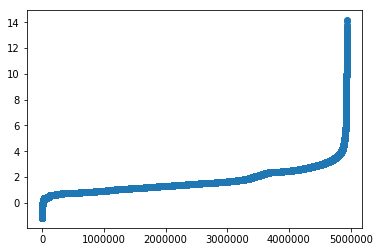

In [38]:
matplotlib.pyplot.scatter(range(len(controversy_values)), np.log(controversy_values))
matplotlib.pyplot.show()

In [54]:
over_ten = [(reverse_index[article], np.log(controversy_value(*values))) for article, values in talk_data.iteritems() if np.log(controversy_value(*values)) > 4]
print len(over_ten)

82890


In [19]:
def controversy_value(length, flags, date):
    if date == 9999:
        date = 2009
    return min(max(np.log((flags + 1) * np.sqrt(length) / np.sqrt(2019 - date)) - 4, 0), 6) / 6

In [15]:
final_index['Toyota C-HR']

4587521

In [16]:
talk_data['4587521']

[5419, 1, 2017]

In [21]:
np.log(controversy_value(*talk_data['4587521']))

4.6454068780630298